## Sales Analysis

In [1]:
# Import neccessary libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
# Merge all 12 months of data in a single csv file

# List Comprehension to read through all files in the directory
files = [file for file in os.listdir('/Users/prophet/Downloads/Store Sales Analysis/SalesAnalysis/Sales_Data')]

# Creating an empty dataframe to store the new concatenated dataframe
all_months_data = pd.DataFrame()

# Concatenate while reading through files in the directory 
for file in files:
    df = pd.read_csv('/Users/prophet/Downloads/Store Sales Analysis/SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

# Save the DataFrame in a new csv file    
all_months_data.to_csv('merged_sales_data.csv', index = False)

In [3]:
# Read the new csv file in a new DataFrame 
sales = pd.read_csv('/Users/prophet/Downloads/Store Sales Analysis/SalesAnalysis/Sales_Data/merged_sales_data.csv')

# Check the first five rows 
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
# Review the DataFrame

# Check for the information of the dataset 
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


***All the data types are objects***

***Since we would want to perform mathematical operations on the Price column. We should change it to a float value***

***Also the Order Date column would be more effective in analysis if we convert it to datetime and use other additional columns for months or even week wise if we want***



### Data Cleaning and Pre-processing

In [5]:
# Convert the 'Order Date' column to datetime
# sales['Order Date'] = pd.to_datetime(sales['Order Date'])

#The code above showed (ParserError: Unknown string format: Order Date),
#there might be some NaN values in the "Order Date" column in the dataset

In [6]:
# Checking for NaN values in the Order Date column 

nan_count = sales['Order Date'].isna().sum()
nan_count

545

***The number of rows with NaN value in the row column seems to be very high and might affect the integrity of the dataset if we remove it***

In [7]:
# Check for NaN values in each column 

nan_counts = sales.isna().sum()
nan_counts

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

***Seems like all the values are missing in these rows and we can remove these rows for the analysis***

In [8]:
# Removing the NA values
# sales = sales.dropna(how = 'all')

In [9]:
# sales.info()
# The code above did not work. It still shows the same number of rows

In [10]:
# sales = sales.replace('NaN', pd.NA).dropna(axis = 1)

In [11]:
# sales.info()
# The code above did not work as well. Thought it had NaN as string values

In [12]:
# Lets try to create a month column other way 

# Create the month column 
sales['Month'] = sales['Order Date'].str[0:2]

# Change the month column type to integer
# sales['Month'] = sales['Month'].astype('int32')

# Check the values 
# sales.head()

# ValueError: invalid literal for int() with base 10: 'Or'

***It still shows the value error***
***For some reason 'Or shows up when we are trying to convert the data type. Probably the first 2 letters from 04 converted to Or while Data Entry***

***Lets find 'Or' and delete it***

In [13]:
# Finding or in the 'Order Data' column 
# sales = sales[sales['Order Date'].str[0:2] == 'Or']


***For some reason the columns are getting duplicated***

***Let's try and remove these***

In [14]:
# Creating a DataFrame where the first two values is not Or
sales = sales[sales['Order Date'].str[0:2] != 'Or']

# Lets check if 545 columns were deleted
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [15]:
186305 - 185950

355

***seems like those were different rows altogether and NA values are still there***

In [16]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [17]:
# Lets check for null values again 
countnull = sales.isna().sum()
countnull

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [18]:
# Dropping the Null Values
sales = sales.dropna()

# Check the dataset
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [20]:
# Check if the NaN values were removed 
count_null = sales.isna().sum()
count_null

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

***We finally have a much ordered dataset now.***

***Let's clean it further***

In [21]:
# Check the data types of columns 
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

***Things we need to do***

***1. Change the data type of 'Price Each' and 'Quantity Ordered' to float to perform mathematical operations.***

***2. Change the month column to assign clearer string values like Jan, Feb, March and so on.***

In [22]:
# Change 'Price Each' to float
sales['Price Each'] = sales['Price Each'].astype(float)

# Change 'Quantity Ordered' to float 
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(float)

# Check the change
sales.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [23]:
# Convert 'Order Date' column to datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

# Create a dictionary for month mapping
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Extract month and map to string values
sales['Month'] = sales['Order Date'].dt.month.map(month_map)


In [24]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec


In [25]:
# Add a column Total Price
sales['Total Price'] = sales['Quantity Ordered'] * sales['Price Each']

# Check the DataFrame
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95


### Exploratory Data Analysis and Data Visualization

***Question 1: What was the best month for sales?***

***Since we have different quantities ordered. We need to have an additional column with (Price * Quantity) as a total price***

***Let's get back to Pre-Processing and add an additional column for this***


In [26]:
# Group by the month and see the best month for sales 

monthly_sales = sales.groupby('Month')['Total Price'].sum().reset_index()

# Lets check the monthly sales 
monthly_sales

,Month,Total Price
0,Apr,3390670.24
1,Aug,2244467.88
2,Dec,4613443.34
3,Feb,2202022.42
4,Jan,1822256.73
5,Jul,2647775.76
6,Jun,2577802.26
7,Mar,2807100.38
8,May,3152606.75
9,Nov,3199603.20


In [27]:
# Let's order them from Jan to Dec 

# Define the month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Sort the DataFrame by the month order
monthly_sales_sorted = monthly_sales.sort_values(by='Month', key=lambda x: x.map({v: k for k, v in enumerate(month_order)}))

# Reset Index 
monthly_sales_sorted = monthly_sales_sorted.reset_index(drop = True)

# Print the sorted DataFrame
monthly_sales_sorted


,Month,Total Price
0,Jan,1822256.73
1,Feb,2202022.42
2,Mar,2807100.38
3,Apr,3390670.24
4,May,3152606.75
5,Jun,2577802.26
6,Jul,2647775.76
7,Aug,2244467.88
8,Sep,2097560.13
9,Oct,3736726.88


In [28]:
# Drop the decimals for better visualization

# Convert 'Total Price' column to integer type
monthly_sales_sorted['Total Price'] = monthly_sales_sorted['Total Price'].astype(int)

# Print the updated DataFrame
print(monthly_sales_sorted)


   Month  Total Price
0    Jan      1822256
1    Feb      2202022
2    Mar      2807100
3    Apr      3390670
4    May      3152606
5    Jun      2577802
6    Jul      2647775
7    Aug      2244467
8    Sep      2097560
9    Oct      3736726
10   Nov      3199603
11   Dec      4613443


***The best month for sales was December***

***Let's put it in the bar graph visualization for better visibility***

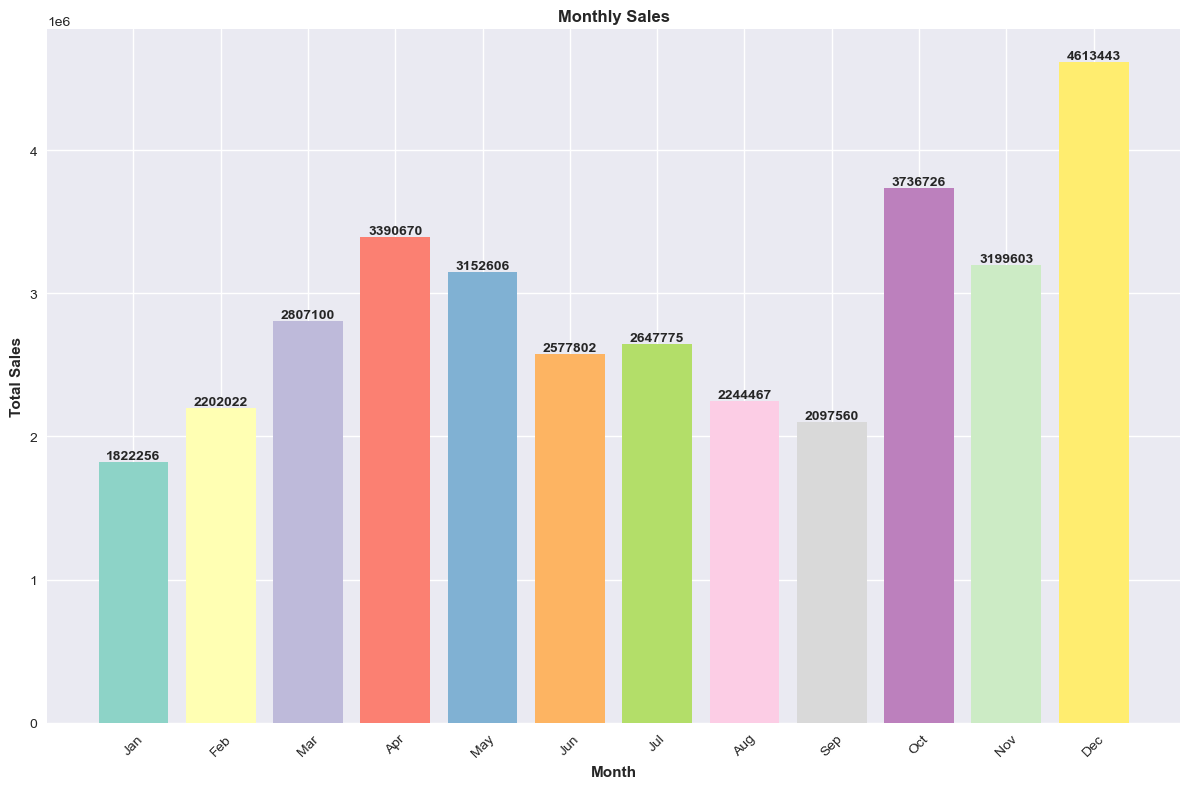

In [29]:
# Set the style of the chart
plt.style.use('seaborn')

# Create a figure and axes
fig, ax = plt.subplots(figsize = (12,8))

# Set the x-axis values and the corresponding heights
x_values = monthly_sales_sorted['Month']
y_values = monthly_sales_sorted['Total Price']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'bold')

# Set labels and title
ax.set_xlabel('Month', fontweight = 'bold')
ax.set_ylabel('Total Sales', fontweight = 'bold')
ax.set_title('Monthly Sales', fontweight = 'bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


***Question2: Which city sold the most product?***

In [30]:
# Look at the Purchase address column 
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95


In [31]:
# Split the Purchase address column and create a new column city 
sales['City'] = sales['Purchase Address'].str.split(',').str[1].str.strip()

# Lets check the City Column 
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95,New York City
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta


In [32]:
# Group the Total Price by City

sales_by_city = sales.groupby('City')['Total Price'].sum().reset_index()

# Drop the decimals for better visualization

# Convert 'Total Price' column to integer type
sales_by_city['Total Price'] = sales_by_city['Total Price'].astype(int)

# Print the sorted DataFrame
sales_by_city

,City,Total Price
0,Atlanta,2795498
1,Austin,1819581
2,Boston,3661642
3,Dallas,2767975
4,Los Angeles,5452570
5,New York City,4664317
6,Portland,2320490
7,San Francisco,8262203
8,Seattle,2747755


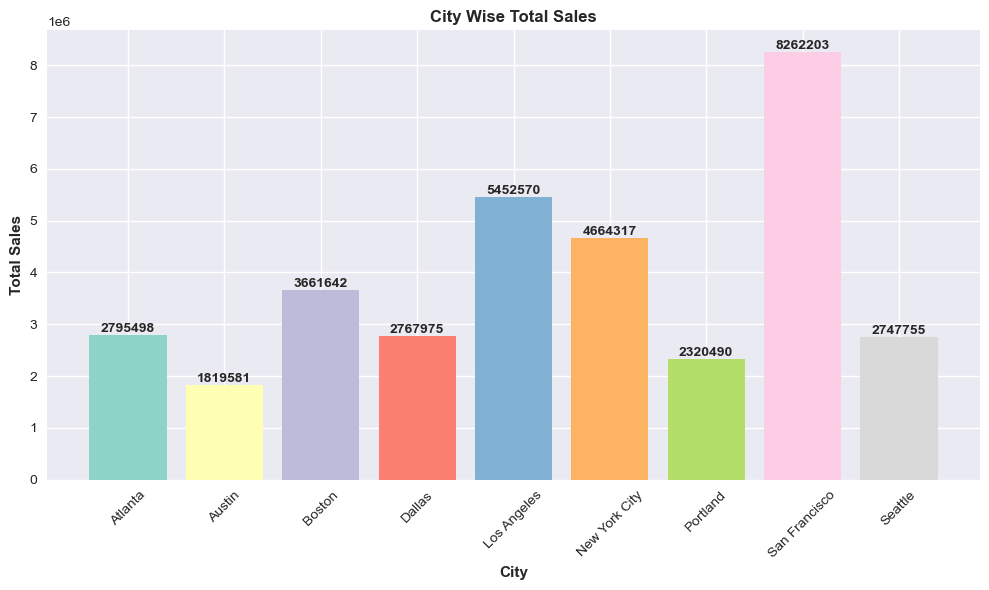

In [33]:
# Set the style of the chart
plt.style.use('seaborn')

# Create a figure and axes
fig, ax = plt.subplots(figsize = (10,6))

# Set the x-axis values and the corresponding heights
x_values = sales_by_city['City']
y_values = sales_by_city['Total Price']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'bold')

# Set labels and title
ax.set_xlabel('City', fontweight = 'bold')
ax.set_ylabel('Total Sales', fontweight = 'bold')
ax.set_title('City Wise Total Sales', fontweight = 'bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


***Question3: What time should we display advertisements to maximize likelihood of customer's buying product?***

In [34]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95,New York City
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta


In [35]:
# Create a new column with the time of purchase 
sales['Purchase Hour'] = sales['Order Date'].dt.hour + 1

sales.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Purchase Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City,8
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95,New York City,19
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco,16
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta,13


In [36]:
# Lets have a look at all the unique values in Purchase Hour column 
sales['Purchase Hour'].unique()

array([ 1,  8, 19, 16, 13, 23, 10, 24, 12, 14, 18, 20, 15, 17,  2,  7, 11,
       21, 22,  9,  4,  6,  3,  5])

***Seems like the store is opened 24*7***

In [37]:
# Group the data by 'Purchase Hour' with respect to 'Quantity Ordered'
purchase_hour_frequency = sales.groupby('Purchase Hour')['Quantity Ordered'].sum().reset_index()

# Convert 'Total Price' column to integer type
purchase_hour_frequency['Quantity Ordered'] = purchase_hour_frequency['Quantity Ordered'].astype(int)

# Check the DataFrame
purchase_hour_frequency.head()

,Purchase Hour,Quantity Ordered
0,1,4428
1,2,2619
2,3,1398
3,4,928
4,5,937


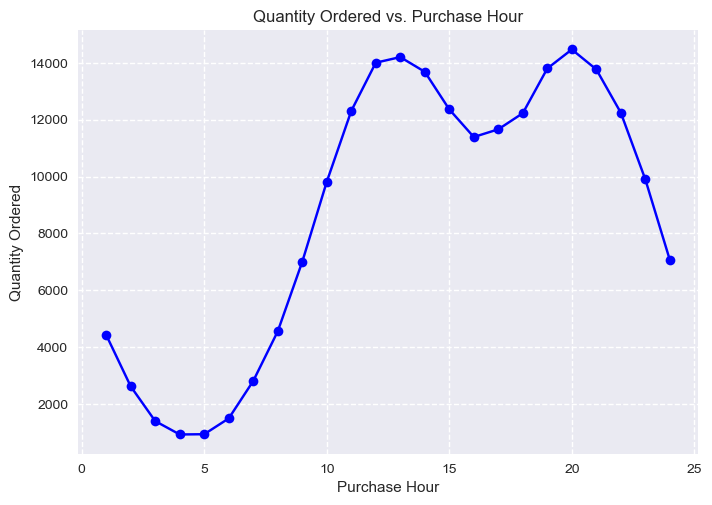

In [38]:
# Lets create a line graph for visualization 

# Set the style of the plot
plt.style.use('seaborn')

# Create the line graph
plt.plot(purchase_hour_frequency['Purchase Hour'], purchase_hour_frequency['Quantity Ordered'], marker='o', linestyle='-', color='blue')

# Set the title and axis labels
plt.title('Quantity Ordered vs. Purchase Hour')
plt.xlabel('Purchase Hour')
plt.ylabel('Quantity Ordered')

# Add grid lines
plt.grid(True, linestyle='--')

# Show the plot
plt.show()


***Two peak hour ranges can be identified here:***

***(11th hour to 15th hour) is one peak and (18th hour to 22nd hour is another peak)***

***The advertisements can be positioned accordingly at these peak hours***

***Question4: What products are most often sold together?***

***It can be fairly assumed that the Products with the same OrderID are sold together***

In [46]:
# Create a new DataFrame with all the duplicated OrderID's 
df = sales[sales['Order ID'].duplicated(keep = False)].copy()

# Create a new column 'Grouped' with all the products related to the Order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Reset the index 
df = df.reset_index(drop = True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Purchase Hour,Grouped
0,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",Dec,600.00,Boston,13,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
1,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",Dec,11.95,Boston,13,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
2,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",Dec,99.99,Boston,13,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
3,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",Dec,11.99,Boston,13,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
4,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",Dec,400.00,New York City,15,"Vareebadd Phone,USB-C Charging Cable"


In [50]:
# Removing duplicated columns 
df = df.drop_duplicates(subset = 'Order ID').reset_index(drop = True)

# Check the Data Frame
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Purchase Hour,Grouped
0,0,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",Dec,600.00,Boston,13,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
1,4,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",Dec,400.00,New York City,15,"Vareebadd Phone,USB-C Charging Cable"
2,6,295703,AA Batteries (4-pack),1.0,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",Dec,3.84,Austin,13,"AA Batteries (4-pack),Bose SoundSport Headphones"
3,8,295726,iPhone,1.0,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",Dec,700.00,Boston,15,"iPhone,Lightning Charging Cable"
4,10,295735,iPhone,1.0,700.00,2019-12-22 18:25:00,"374 Lincoln St, New York City, NY 10001",Dec,700.00,New York City,19,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [62]:
# Create a new DataFrame to store the combinations and counts
combination_counts = pd.DataFrame(columns=['Combination', 'Count'])

# Iterate over the 'Grouped' column and count the combinations
for combination, count in df['Grouped'].value_counts().items():
    combination_counts = pd.concat([combination_counts, pd.DataFrame({'Combination': [combination], 'Count': [count]})])

# Reset the index of the new DataFrame
combination_counts = combination_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Display the Top Ten Combinations 
top_ten_combinations = combination_counts.head(10)

# Display the new DataFrame
top_ten_combinations


,Combination,Count
0,"iPhone,Lightning Charging Cable",882
1,"Google Phone,USB-C Charging Cable",856
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303
5,"iPhone,Apple Airpods Headphones",286
6,"Google Phone,Bose SoundSport Headphones",161
7,"Vareebadd Phone,Wired Headphones",104
8,"Google Phone,USB-C Charging Cable,Wired Headph...",77
9,"Vareebadd Phone,Bose SoundSport Headphones",60


***Now lets create a visualisation for the Top Ten combinations***

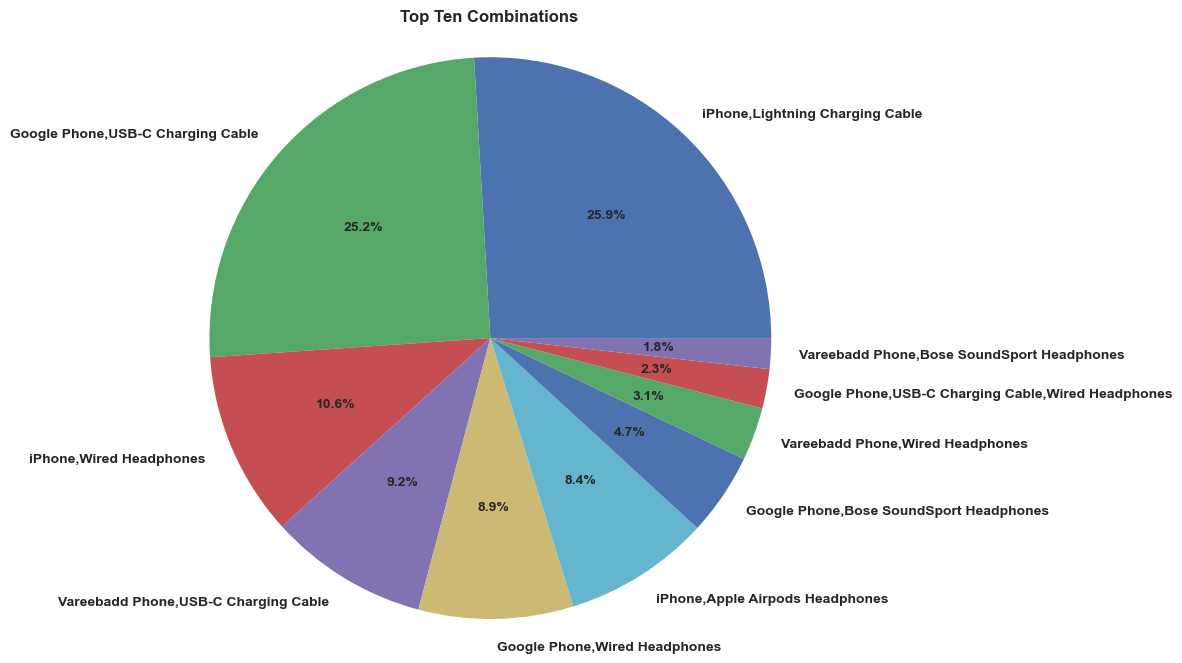

In [69]:
# Create a pie chart for the top ten combinations

# Set the figure size
plt.figure(figsize=(8, 8))  
plt.pie(top_ten_combinations['Count'], labels=top_ten_combinations['Combination'], autopct='%1.1f%%', textprops={'weight': 'bold'})
plt.title('Top Ten Combinations', fontweight = 'bold')

# Equal aspect ratio to ensure that pie is drawn as a circle
plt.axis('equal') 

# Show the plot 
plt.show()


***The plot shows how Iphone with Lightning Charging Cable and Google Phone with USB_C Charging Cable are a major chunk of the Top Ten combinations***

***Question5: What product sold the most?***

In [70]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Purchase Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",Dec,1700.00,New York City,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",Dec,600.00,New York City,8
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",Dec,11.95,New York City,19
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",Dec,149.99,San Francisco,16
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Dec,11.95,Atlanta,13


In [80]:
# Group data by Product w.r.t. Quantity Ordered
products_sold = sales.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Check the DataFrame 
products_sold

,Product,Quantity Ordered
0,20in Monitor,4129.0
1,27in 4K Gaming Monitor,6244.0
2,27in FHD Monitor,7550.0
3,34in Ultrawide Monitor,6199.0
4,AA Batteries (4-pack),27635.0
5,AAA Batteries (4-pack),31017.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
8,Flatscreen TV,4819.0
9,Google Phone,5532.0


***Let's see Top 5 best performing products and give them a visualization for our stakeholders***

In [90]:
top_products_sold = products_sold.nlargest(20, 'Quantity Ordered').reset_index(drop = True)

top_products_sold['Quantity Ordered'] = top_products_sold['Quantity Ordered'].astype(int)

top_products_sold


,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


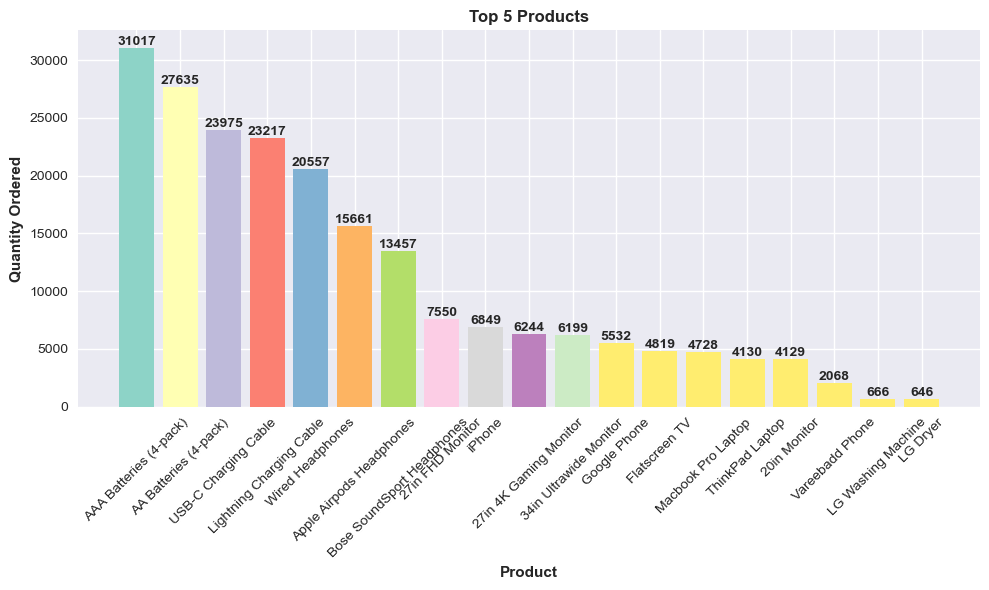

In [91]:
# Set the style of the chart
plt.style.use('seaborn')

# Create a figure and axes
fig, ax = plt.subplots(figsize = (10,6))

# Set the x-axis values and the corresponding heights
x_values = top_products_sold['Product']
y_values = top_products_sold['Quantity Ordered']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'bold')
    
# Set labels and title
ax.set_xlabel('Product', fontweight = 'bold')
ax.set_ylabel('Quantity Ordered', fontweight = 'bold')
ax.set_title('Top 5 Products', fontweight = 'bold')

# Plot the line graph for mean prices
ax.plot(prices.index, prices.values, color='red', marker='o', linestyle='-', linewidth=2)

# Set labels and title
ax.set_xlabel('Product', fontweight='bold')
ax.set_ylabel('Quantity Ordered', fontweight='bold')
ax.set_title('Top 5 Products with Mean Prices', fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


***Let's try to figure out if there is any correlation between the prices and the quantity bought***


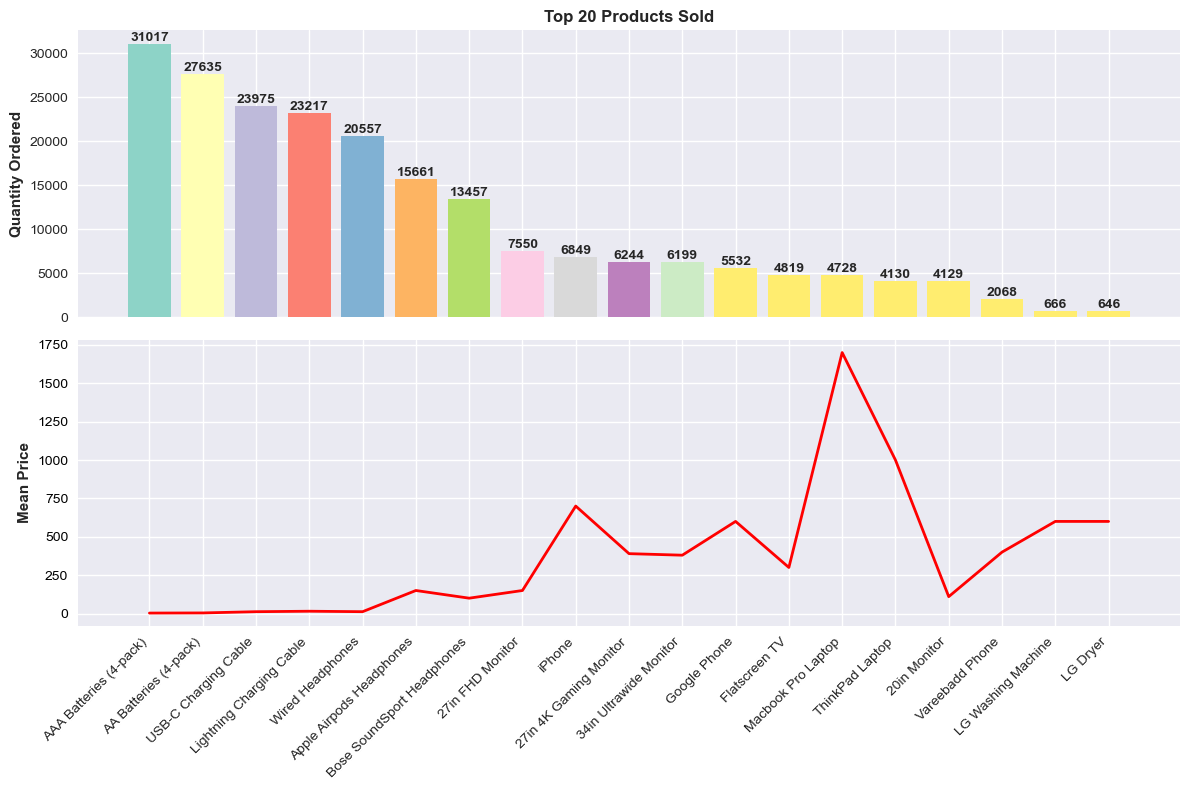

In [113]:
# Set the style of the chart
plt.style.use('seaborn')

# Create a figure and axes for the bar graph
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))

# Set the x-axis values and the corresponding heights for the bar graph
x_values = top_products_sold['Product']
y_values = top_products_sold['Quantity Ordered']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax1.bar(x_values, y_values, color=colors, label='Quantity Ordered')

# Add labels to the bars
for i, v in enumerate(y_values):
    ax1.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

# Set labels and title for the bar graph
ax1.set_ylabel('Quantity Ordered', fontweight='bold')
ax1.set_title('Top 20 Products Sold', fontweight='bold')

# Plot the line graph for mean prices
mean_prices = sales.groupby('Product')['Price Each'].mean().loc[top_products_sold['Product']]
ax2.plot(mean_prices.index, mean_prices.values, color='red', linewidth=2)

# Set ylabel and intervals for the line graph y-axis
ax2.set_ylabel('Mean Price', fontweight='bold')
ax2.tick_params(axis='y', colors='black')

# Adjust the spacing and rotation of x-axis labels
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

# Display the chart
plt.tight_layout()
plt.show()


***So, this does show a certain level of correlation as the the quantites more sold are of very less prices like batteries, charging cable etc.***

***A little inconsitency can be seen with the MacBook Pro and Thinkpad. Even with higher prices than LG Washing Machines they are demanded more.***

***Might be that there are more college or universities near the store and hence more students resulting in this. Or due to the fact that people don't change there washing machines as often they change there phones and laptops***